In [1]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [2]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [3]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [5]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [6]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [7]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renome le cnit

In [8]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [9]:
datap=new_data.loc[new_data['N']>20]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie']]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0        368.000000     358.498030    ES         

In [10]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [11]:
datap.dropna(inplace=True)
datap.describe()

,mean_cylindree,mean_co2_theorique,mean_ptr,mean_charge_utile,mean_puis_kw,mean_co2_reel,mean_nb_decibels
count,39755.000000,39755.000000,39755.000000,39755.000000,39755.000000,39755.000000,39755.000000
mean,1628.491150,130.483087,3563.892005,592.574447,112.186234,154.727231,74.127828
std,465.401438,33.800310,776.742709,90.683188,40.680494,29.675542,3.714219
min,874.102052,13.836735,0.000000,224.074713,44.000000,31.824490,56.000000
25%,1332.000000,122.959743,2995.000000,541.000000,88.000000,142.388981,72.000000
50%,1499.000000,134.846561,3480.000000,575.000000,110.000000,155.821720,74.000000
75%,1968.000000,147.596392,3955.000000,616.000000,120.000000,168.940433,76.000000
max,5000.000000,373.000000,6850.000000,1243.000000,478.000000,405.892593,96.000000


In [12]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [13]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [14]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [15]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [16]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [17]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

,mean_cylindree,mean_co2_theorique,mean_ptr,mean_charge_utile,mean_puis_kw,mean_nb_decibels,ES,GO,FE,EE,...,BERLINE,TS TERRAINS/CHEMINS,BREAK,MINIBUS,MONOSPACE COMPACT,COMBISPACE,COUPE,MONOSPACE,MINISPACE,CABRIOLET
count,3.975500e+04,3.975500e+04,39755.000000,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,...,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04,3.975500e+04
mean,1.315456e-16,-4.575498e-16,0.000000,-8.035719e-16,-1.086681e-16,-6.720263e-17,-1.286859e-17,1.143875e-17,-8.579060e-18,2.287749e-17,...,-1.215367e-17,4.289530e-18,5.147436e-17,-1.072382e-17,-5.433404e-17,5.719373e-17,2.287749e-17,-1.376224e-17,-1.000890e-17,-1.215367e-17
std,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.620963e+00,-3.451087e+00,-4.588311,-4.063646e+00,-1.676162e+00,-4.880718e+00,-7.726806e-01,-7.025627e-01,-5.409631e-02,-3.039414e-01,...,-6.593424e-01,-1.005777e+00,-3.387802e-01,-1.225261e-01,-1.861177e-01,-1.569707e-01,-9.679262e-02,-6.215659e-02,-2.298945e-02,-7.217152e-02
25%,-6.370734e-01,-2.225849e-01,-0.732416,-5.687393e-01,-5.945488e-01,-5.728943e-01,-7.726806e-01,-7.025627e-01,-5.409631e-02,-3.039414e-01,...,-6.593424e-01,-1.005777e+00,-3.387802e-01,-1.225261e-01,-1.861177e-01,-1.569707e-01,-9.679262e-02,-6.215659e-02,-2.298945e-02,-7.217152e-02
50%,-2.782389e-01,1.290973e-01,-0.108006,-1.938029e-01,-5.374226e-02,-3.441635e-02,-7.726806e-01,-7.025627e-01,-5.409631e-02,-3.039414e-01,...,-6.593424e-01,9.942562e-01,-3.387802e-01,-1.225261e-01,-1.861177e-01,-1.569707e-01,-9.679262e-02,-6.215659e-02,-2.298945e-02,-7.217152e-02
75%,7.295060e-01,5.063125e-01,0.503530,2.583263e-01,1.920789e-01,5.040616e-01,1.294196e+00,1.423361e+00,-5.409631e-02,-3.039414e-01,...,1.516663e+00,9.942562e-01,-3.387802e-01,-1.225261e-01,-1.861177e-01,-1.569707e-01,-9.679262e-02,-6.215659e-02,-2.298945e-02,-7.217152e-02
max,7.244394e+00,7.175081e+00,4.230679,7.172594e+00,8.992476e+00,5.888841e+00,1.294196e+00,1.423361e+00,1.848555e+01,3.290107e+00,...,1.516663e+00,9.942562e-01,2.951766e+00,8.161528e+00,5.372943e+00,6.370614e+00,1.033137e+01,1.608840e+01,4.349822e+01,1.385588e+01


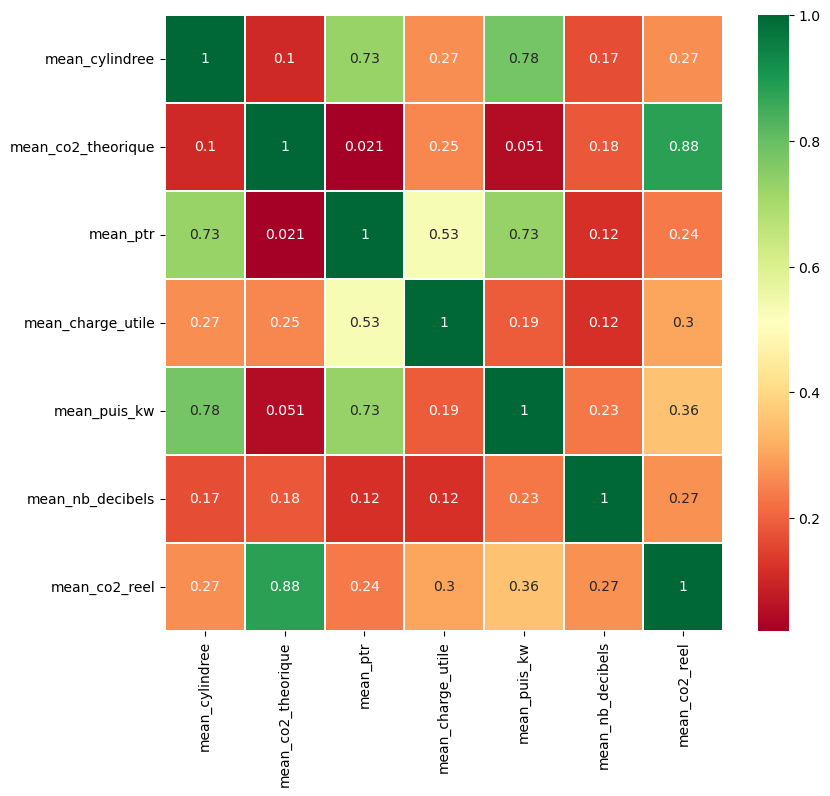

In [18]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [20]:
regression_alg=LinearRegression()

In [21]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [22]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [23]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [24]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [25]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [26]:
dataOG = dataOG.iloc[list(y_test.index)]

In [27]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


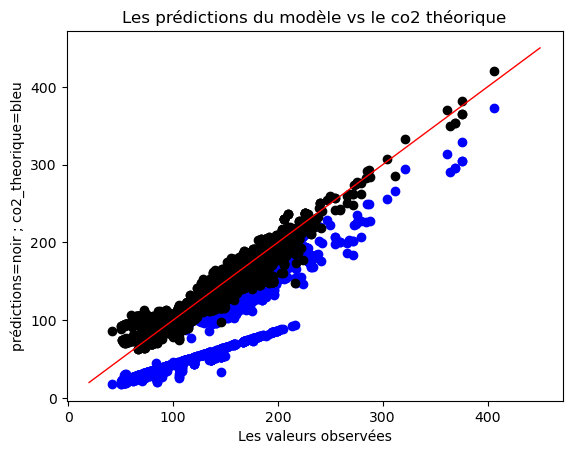

In [28]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [29]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [30]:
lasso_model = Lasso(alpha=0.2)

In [31]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [32]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [33]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


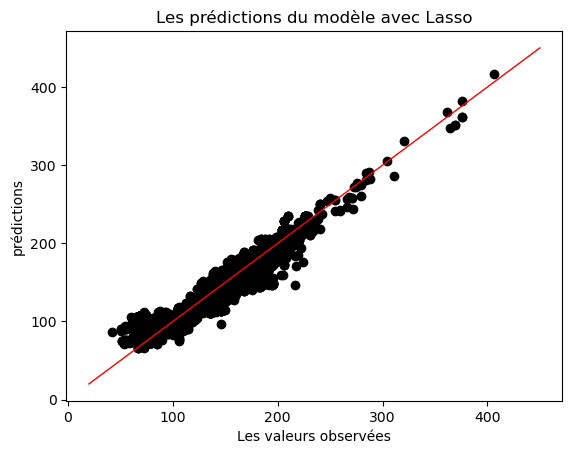

In [34]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [36]:
X_train

,mean_cylindree,mean_co2_theorique,mean_ptr,mean_charge_utile,mean_puis_kw,mean_nb_decibels,ES,GO,FE,EE,...,BERLINE,TS TERRAINS/CHEMINS,BREAK,MINIBUS,MONOSPACE COMPACT,COMBISPACE,COUPE,MONOSPACE,MINISPACE,CABRIOLET
34457,1969.0,171.633333,4700.0,606.000000,145.0,72.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
44140,1798.0,99.000000,2515.0,415.000000,72.0,70.983051,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2526,999.0,147.168731,2840.0,520.000000,88.0,69.000000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
993,1950.0,160.174254,5130.0,730.047096,180.0,79.000000,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6051,1499.0,134.317333,3585.0,584.000000,88.0,72.000000,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43920,1995.0,146.622222,3990.0,580.000000,110.0,74.000000,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
23715,1499.0,117.732494,2930.0,525.000000,81.0,76.000000,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
34864,1997.0,161.114286,3965.0,580.000000,130.0,75.000000,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
49463,1968.0,139.103448,3875.0,625.000000,150.0,72.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [38]:
y_pred = knn.predict(X_test)

In [39]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


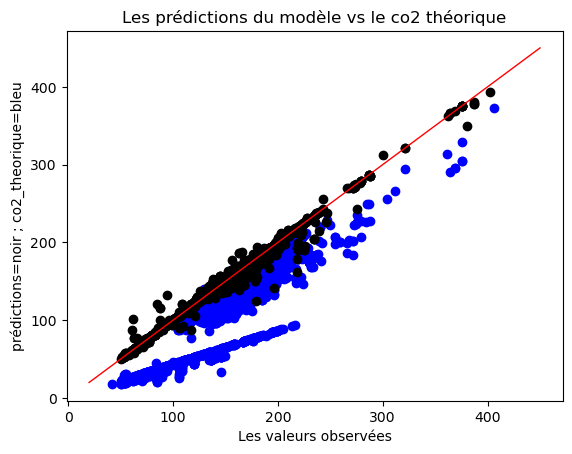

In [40]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [41]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

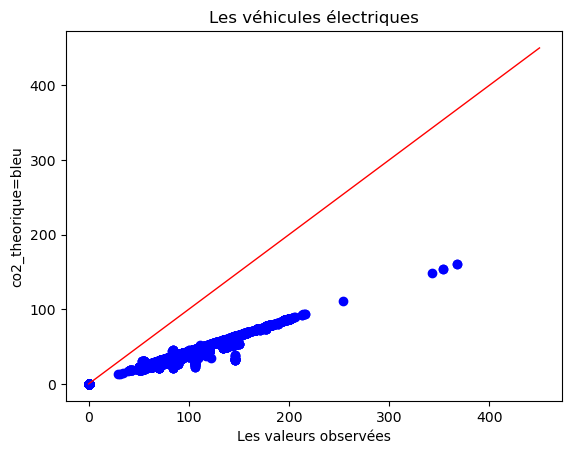

In [42]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

# MODELE SELECTION
## cross validation

In [47]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [48]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [49]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [50]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

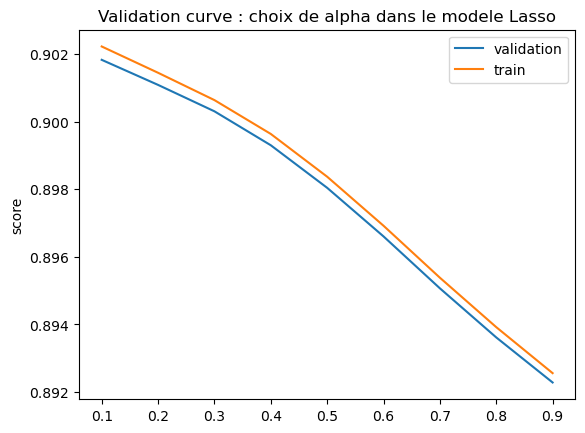

In [51]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [52]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [53]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [54]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [55]:
model_lasso=grid_lasso.best_estimator_

In [56]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [57]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


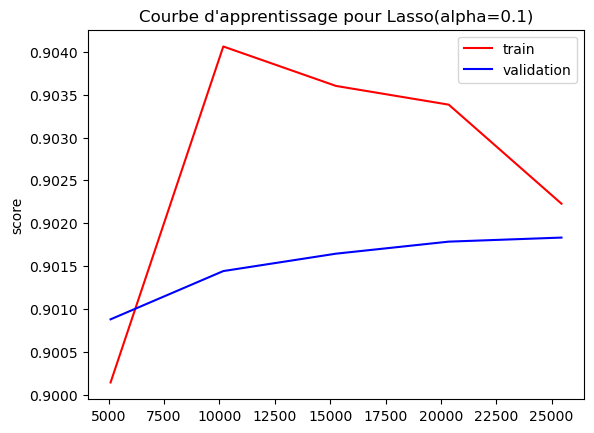

In [58]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

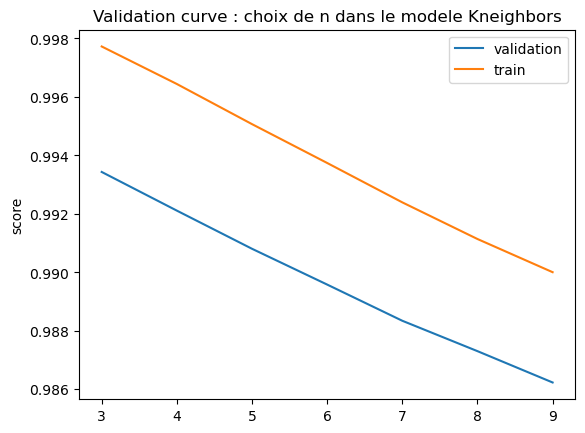

In [59]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


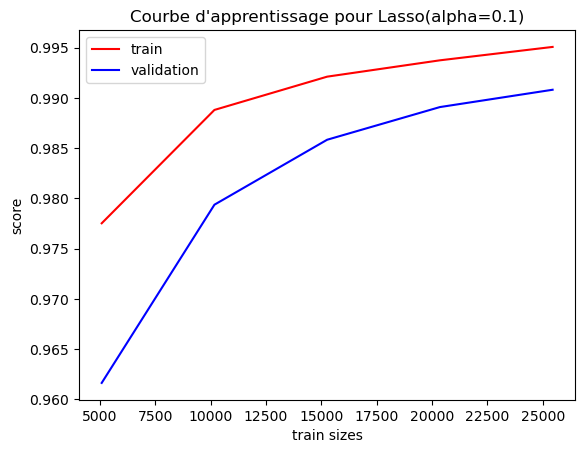

In [60]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [61]:
data.head()

,Type,energ,marque_corr,modele_corr,nb_pl_ass,puis_fisc,min_year_circ,max_year_circ,mean_cylindree,mean_co2_theorique,...,sd_cylindree,sd_co2_theorique,sd_co2_theorique_corr,sd_co2_reel,sd_nb_decibels,sd_ptr,sd_ptac,sd_charge_utile,sd_puis_kw,N
0,M10NSSVP000X313,ES,NISSAN,MICRA,5.0,5.0,2010,2011,1240.0,159.0,...,0.0,0.0,0.0,0.198246,0.0,0.0,0.0,12.146097,0.0,343
1,M10VWGVP000N375,GO,VOLKSWAGEN,GOLF,5.0,5.0,2010,2014,1598.0,118.0,...,0.0,0.0,0.0,1.664602,0.0,0.0,0.0,3.398169,0.0,4981
2,M10SKDVP000S107,GO,SKODA,FABIA,5.0,5.0,2010,2011,1422.0,120.0,...,0.0,0.0,0.0,0.288651,0.0,0.0,0.0,2.203026,0.0,1159
3,MJH1302TT635,ES,HONDA,JAZZ,5.0,6.0,2010,2010,1339.0,130.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,13
4,M10VWGVP000W578,GO,VOLKSWAGEN,POLO,5.0,4.0,2010,2013,1598.0,109.0,...,0.0,0.0,0.0,0.116386,0.0,0.0,0.0,1.299188,0.0,15200
